<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_7/capstone/7_1a_data_wrangling_no_api_keys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling
- Audio Features
- Lyric Data

First, we'll get our songs from Spotify. In addition to time and genre, Spotify likes to classify songs by mood. Some examples include "Feelin' Good", "Indie Sunshine", and "Calm Down". So we'll classify our songs, as either "happy" or "chill", as these are two major categories Spotify uses to classify music.

We can access specific playlists using spotiPy and the Spotify API. We'll download songs from a collection of playlists generated by Spotify. We'll assign target values to each song based on mood, songs marked as "happy" will be assigned a target value of 1 and "chill" songs will have a target value of 0.

After getting each song's unique ID we can pass them to spotiPy and get Spotify's audio features for each song. Features include numeric measures like "acousticness", "energy", "dancability", and musical qualities like "mode" and "tempo". Using spotiPy we can get additional information such as a "popularity" score, an "explicit" boolean, and artist and track names.

With our artist and track names we can feed those into the Lyrics Genius API and get lyric strings for each song if available.

With our audio features and lyrics we can analyze our songs using two approaches: supervised modeling and natural language processing.

In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [0]:
filename = "spotify_features"
Audio_features = pd.read_csv(filename + ".csv", index_col=0)

print(Audio_features.shape)
print(Audio_features.dropna().shape)
Audio_features.head()

(3837, 18)
(3837, 18)


,id,target,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,year
0,7eElVgPcxDqmgGrSwVFI74,0,0.1730,0.796,197236,0.467,True,0.004110,6,0.1260,-10.369,1,59,0.1810,107.901,4,0.516,2017
1,02oAUzv4M0ItuTDy2RT3IT,0,0.2870,0.771,189796,0.431,True,0.000003,10,0.0934,-5.423,1,59,0.0577,107.047,4,0.268,2017
2,5q4BpnMrYEFzLO0dYODj6J,0,0.2390,0.664,271088,0.382,False,0.007490,0,0.0943,-9.977,1,61,0.0470,123.214,4,0.126,2017
3,6Kkt27YmFyIFrcX3QXFi2o,0,0.9200,0.587,171728,0.229,False,0.000000,10,0.1000,-11.254,0,69,0.1280,75.670,4,0.379,2017
4,1Dp7JGFNjvg8Nk0CtMCcnr,0,0.0328,0.487,367391,0.445,True,0.010400,1,0.0778,-10.959,0,60,0.1130,97.031,4,0.180,2017


In [0]:
filename = "spotify_pos_data"

# change field size to avoid ParseError
#import sys
#import csv
#csv.field_size_limit(sys.maxsize)
df_pos = pd.read_csv(filename + ".csv", index_col=0)

# set engine="python" to avoid ParseError
# set error_bad_lines=False
#df_pos = pd.read_csv(filename + ".csv", index_col=0,
#                     engine="python", error_bad_lines=False)

print(df_pos.shape)
print(df_pos.dropna().shape)
df_pos.head()

(1905, 26)
(1728, 26)


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target,track,artist,album,release_date,year,popularity,explicit,lyrics_raw
id,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,0.004110,6,0.1260,-10.369,1,0.1810,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,0,sober,lorde,Melodrama,2017-06-16,2017,59,True,"[Intro]\nNight, midnight, lose my mind\nNight,..."
02oAUzv4M0ItuTDy2RT3IT,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,0.000003,10,0.0934,-5.423,1,0.0577,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,0,homemade dynamite,lorde,Melodrama,2017-06-16,2017,59,True,[Verse 1]\nA couple rebel top gun pilots\nFlyi...
5q4BpnMrYEFzLO0dYODj6J,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,0.007490,0,0.0943,-9.977,1,0.0470,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,0,the louvre,lorde,Melodrama,2017-06-16,2017,61,False,"[Verse 1]\nWell, summer slipped us underneath ..."
6Kkt27YmFyIFrcX3QXFi2o,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,0.000000,10,0.1000,-11.254,0,0.1280,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,0,liability,lorde,Melodrama,2017-06-16,2017,69,False,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu..."
1Dp7JGFNjvg8Nk0CtMCcnr,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,0.010400,1,0.0778,-10.959,0,0.1130,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,0,hard feelings loveless,lorde,Melodrama,2017-06-16,2017,60,True,Hard Feelings\n\n(Go back and tell it)\n\nPlea...


In [0]:
filename = "spotify_neg_data"
df_neg = pd.read_csv(filename + ".csv", index_col=0)

print(df_neg.shape)
print(df_neg.dropna().shape)
df_neg.head()

(1932, 25)
(1927, 25)


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target,track,artist,album,release_date,year,popularity,explicit
id,,,,,,,,,,,,,,,,,,,,,,,,,
49FGDCURPhI4VGn3Y7bmLT,0.2420,https://api.spotify.com/v1/audio-analysis/49FG...,0.561,234213,0.741,0.000000,0,0.0874,-5.842,1,0.0537,127.467,4,https://api.spotify.com/v1/tracks/49FGDCURPhI4...,audio_features,spotify:track:49FGDCURPhI4VGn3Y7bmLT,0.404,1,16 days,whiskeytown,Strangers Almanac [Deluxe Edition],1997-01-01,1997,7,False
7136gj6H3nc3ZIKmJmxKRT,0.0683,https://api.spotify.com/v1/audio-analysis/7136...,0.551,215533,0.807,0.000004,0,0.1030,-5.839,1,0.0310,126.722,4,https://api.spotify.com/v1/tracks/7136gj6H3nc3...,audio_features,spotify:track:7136gj6H3nc3ZIKmJmxKRT,0.824,1,always a friend,alejandro escovedo,Real Animal,2008-01-01,2008,39,False
2hsf7VvrBm44soR5rtDVXw,0.0427,https://api.spotify.com/v1/audio-analysis/2hsf...,0.556,220587,0.504,0.000356,9,0.0582,-11.513,1,0.0293,84.421,4,https://api.spotify.com/v1/tracks/2hsf7VvrBm44...,audio_features,spotify:track:2hsf7VvrBm44soR5rtDVXw,0.616,1,if it takes a lifetime,jason isbell,Something More Than Free,2015-07-17,2015,53,False
31nItlXwgCCFpttS50Rbxf,0.6730,https://api.spotify.com/v1/audio-analysis/31nI...,0.341,288133,0.249,0.000445,8,0.1070,-12.009,1,0.0445,84.036,3,https://api.spotify.com/v1/tracks/31nItlXwgCCF...,audio_features,spotify:track:31nItlXwgCCFpttS50Rbxf,0.173,1,fruits of my labor,lucinda williams,World Without Tears,2003-01-01,2003,52,False
5cDfI3KOa64zbuUgD6a4hG,0.2880,https://api.spotify.com/v1/audio-analysis/5cDf...,0.516,189507,0.583,0.000000,4,0.2980,-8.197,1,0.0277,136.088,4,https://api.spotify.com/v1/tracks/5cDfI3KOa64z...,audio_features,spotify:track:5cDfI3KOa64zbuUgD6a4hG,0.381,1,blue,the jayhawks,Tomorrow The Green Grass,1995-02-14,1995,49,False


In [0]:
filename = "spotify_lyrics_raw"
df_lyrics = pd.read_csv(filename + ".csv", index_col=0)

print(df_lyrics.shape)
print(df_lyrics.dropna().shape)
df_lyrics.head()

## Spotify Data

In [0]:
# install spotiPy package
! pip install spotipy

  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built spotipy


In [0]:
# import spotiPy
import spotipy
import spotipy.oauth2 as oauth2

### Connect to API

To use the Spotify API first create an app within the Spotify developer environment.

Go to the Spotify Developer page, log in and navigate to the **My Applications** page.

Create a new application and specify a name. Make note of the `Client ID` and `Client Secret`, they will be necessary later.

On the application creation screen set the `Redirect URLs field`. This is where your application goes after a success or failure to log in to Spotify.
Set the `Redirect URis field` to `localhost:8888`.

In [0]:
cid = None
secret = None
#username = None
username = None

credentials = oauth2.SpotifyClientCredentials(
    client_id=cid,
    client_secret=secret)

token = credentials.get_access_token()

if token:
  sp = spotipy.Spotify(auth=token)
else:
  print("Can't get token for", username)

In [0]:
# test that this worked
lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=682502831efa4a3992fc25308b2f8ff2
cover art: https://i.scdn.co/image/e6e513e68c4eefdfc7bc213b35061c9c30b42dfa

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=682502831efa4a3992fc25308b2f8ff2
cover art: https://i.scdn.co/image/557a6058e3de72bf37ffcd2c12dd5932276df344

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=682502831efa4a3992fc25308b2f8ff2
cover art: https://i.scdn.co/image/5fa3a6cc1848ea743a293d2088046746d1b09608

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=682502831efa4a3992fc25308b2f8ff2
cover art: https://i.scdn.co/image/557a6058e3de72bf37ffcd2c12dd5932276df344

track    : Good Times Bad Times - 1993 Remaster
audio    : htt

In [0]:
name = 'Radiohead'

results = sp.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])

Radiohead https://i.scdn.co/image/afcd616e1ef2d2786f47b3b4a8a6aeea24a72adc


### Get Spotify Data

#### Spotify IDs

In [0]:
def get_ids(user, playlist_id):
  """
  """
  # get list of good tracks from playlist
  playlist = sp.user_playlist(user=user, playlist_id=playlist_id)

  tracks = playlist["tracks"]
  songs = tracks["items"] 

  while tracks['next']:
    tracks = sp.next(tracks)
    for item in tracks["items"]:
      songs.append(item)

  ids = [] 
  for i in range(len(songs)):
    ids.append(songs[i]['track']['id'])
    
  # drop duplicates
  ids = [x for x in pd.Series(ids).unique()]
  
  return ids

In [0]:
# positive playlist
user = "1287242681"
playlist_id="5OdH7PmotfAO7qDGxKdw3J"

pos_ids = get_ids(user, playlist_id)

# confirm this worked
print(len(pos_ids))
pos_ids[:5]

1905


['7eElVgPcxDqmgGrSwVFI74',
 '02oAUzv4M0ItuTDy2RT3IT',
 '5q4BpnMrYEFzLO0dYODj6J',
 '6Kkt27YmFyIFrcX3QXFi2o',
 '1Dp7JGFNjvg8Nk0CtMCcnr']

In [0]:
# negative playlist
user = "1287242681"
playlist_id="3ySDAXYGUwRrp8C4ejIm9m"

neg_ids = get_ids(user, playlist_id)

# confirm this worked
print(len(neg_ids))
neg_ids[:5]

1932


['49FGDCURPhI4VGn3Y7bmLT',
 '7136gj6H3nc3ZIKmJmxKRT',
 '2hsf7VvrBm44soR5rtDVXw',
 '31nItlXwgCCFpttS50Rbxf',
 '5cDfI3KOa64zbuUgD6a4hG']

#### Audio Features

In [0]:
sp.audio_features(pos_ids[0])

[{'acousticness': 0.173,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7eElVgPcxDqmgGrSwVFI74',
  'danceability': 0.796,
  'duration_ms': 197236,
  'energy': 0.467,
  'id': '7eElVgPcxDqmgGrSwVFI74',
  'instrumentalness': 0.00411,
  'key': 6,
  'liveness': 0.126,
  'loudness': -10.369,
  'mode': 1,
  'speechiness': 0.181,
  'tempo': 107.901,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/7eElVgPcxDqmgGrSwVFI74',
  'type': 'audio_features',
  'uri': 'spotify:track:7eElVgPcxDqmgGrSwVFI74',
  'valence': 0.516}]

In [0]:
def get_features(ids, t):
  """
  """
  assert type(t) == int
  features = []
  for i in range(0,len(ids),50):
    audio_features = sp.audio_features(ids[i:i+50])
    for track in audio_features:
      features.append(track)
        
  # drop None values
  features = [i for i in features if i]

  # load data into DataFrame
  features =  pd.DataFrame(features)
  
  # set index to "id"
  features = features.set_index("id")
  
  # set target value
  features["target"] = t
  
  return features

In [0]:
# positive IDs
df_pos = get_features(pos_ids, t=0)

print(df_pos.shape)
print(df_pos.dropna().shape)
df_pos.head()

(1905, 18)
(1905, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target
id,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,0.004110,6,0.1260,-10.369,1,0.1810,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,0
02oAUzv4M0ItuTDy2RT3IT,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,0.000003,10,0.0934,-5.423,1,0.0577,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,0
5q4BpnMrYEFzLO0dYODj6J,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,0.007490,0,0.0943,-9.977,1,0.0470,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,0
6Kkt27YmFyIFrcX3QXFi2o,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,0.000000,10,0.1000,-11.254,0,0.1280,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,0
1Dp7JGFNjvg8Nk0CtMCcnr,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,0.010400,1,0.0778,-10.959,0,0.1130,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,0


In [0]:
# negative IDs
df_neg = get_features(neg_ids, t=1)

print(df_neg.shape)
print(df_neg.dropna().shape)
df_neg.head()

(1932, 18)
(1932, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target
id,,,,,,,,,,,,,,,,,,
49FGDCURPhI4VGn3Y7bmLT,0.2420,https://api.spotify.com/v1/audio-analysis/49FG...,0.561,234213,0.741,0.000000,0,0.0874,-5.842,1,0.0537,127.467,4,https://api.spotify.com/v1/tracks/49FGDCURPhI4...,audio_features,spotify:track:49FGDCURPhI4VGn3Y7bmLT,0.404,1
7136gj6H3nc3ZIKmJmxKRT,0.0683,https://api.spotify.com/v1/audio-analysis/7136...,0.551,215533,0.807,0.000004,0,0.1030,-5.839,1,0.0310,126.722,4,https://api.spotify.com/v1/tracks/7136gj6H3nc3...,audio_features,spotify:track:7136gj6H3nc3ZIKmJmxKRT,0.824,1
2hsf7VvrBm44soR5rtDVXw,0.0427,https://api.spotify.com/v1/audio-analysis/2hsf...,0.556,220587,0.504,0.000356,9,0.0582,-11.513,1,0.0293,84.421,4,https://api.spotify.com/v1/tracks/2hsf7VvrBm44...,audio_features,spotify:track:2hsf7VvrBm44soR5rtDVXw,0.616,1
31nItlXwgCCFpttS50Rbxf,0.6730,https://api.spotify.com/v1/audio-analysis/31nI...,0.341,288133,0.249,0.000445,8,0.1070,-12.009,1,0.0445,84.036,3,https://api.spotify.com/v1/tracks/31nItlXwgCCF...,audio_features,spotify:track:31nItlXwgCCFpttS50Rbxf,0.173,1
5cDfI3KOa64zbuUgD6a4hG,0.2880,https://api.spotify.com/v1/audio-analysis/5cDf...,0.516,189507,0.583,0.000000,4,0.2980,-8.197,1,0.0277,136.088,4,https://api.spotify.com/v1/tracks/5cDfI3KOa64z...,audio_features,spotify:track:5cDfI3KOa64zbuUgD6a4hG,0.381,1


#### More API Data

In [0]:
track_info = sp.track(df_pos.index[0])
print(type(track_info))
for key in track_info.keys():
  print(key, ":", track_info[key])

<class 'dict'>
album : {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/163tK9Wjr9P9DmM0AVK7lm'}, 'href': 'https://api.spotify.com/v1/artists/163tK9Wjr9P9DmM0AVK7lm', 'id': '163tK9Wjr9P9DmM0AVK7lm', 'name': 'Lorde', 'type': 'artist', 'uri': 'spotify:artist:163tK9Wjr9P9DmM0AVK7lm'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/2B87zXm9bOWvAJdkJBTpzF'}, 'href': 'https://api.spotify.com/v1/albums/2B87zXm9bOWvAJdkJBTpzF', 'id': '2B87zXm

In [0]:
def get_track_info(df):
  """
  """
  track_info = []
  for i in range(0, len(df.index)):
    track_info.append(sp.track(df.index[i]))
  
  # 
  track_titles = []
  artist_names = []
  album_titles = []
  release_dates = []
  popularity = []
  explicit = []
  
  for i in range(len(track_info)):
    # track name
    track_titles.append(track_info[i]["name"])
    # artist names
    artist_names.append(track_info[i]["artists"][0]["name"])
    # album titles
    album_titles.append(track_info[i]['album']["name"])
    # release dates
    release_dates.append(track_info[i]['album']["release_date"])
    # popularity
    popularity.append(track_info[i]["popularity"])
    # explicitness
    explicit.append(track_info[i]["explicit"])
  
  df["track"] = track_titles
  df["artist"] = artist_names
  df["album"] = album_titles
  df["release_date"] = release_dates
  # convert to datetime
  df["release_date"] = pd.to_datetime(df["release_date"])
  df["year"] = [date.year for date in df["release_date"]]
  df["popularity"] = popularity
  df["explicit"] = explicit
  
  return df

In [0]:
df_pos = get_track_info(df_pos)

print(df_pos.shape)
print(df_pos.dropna().shape)
df_pos.head()

retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
(1905, 25)
(1905, 25)


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target,track,artist,album,release_date,year,popularity,explicit
id,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,0.004110,6,0.1260,-10.369,1,0.1810,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,0,Sober,Lorde,Melodrama,2017-06-16,2017,59,True
02oAUzv4M0ItuTDy2RT3IT,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,0.000003,10,0.0934,-5.423,1,0.0577,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,0,Homemade Dynamite,Lorde,Melodrama,2017-06-16,2017,59,True
5q4BpnMrYEFzLO0dYODj6J,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,0.007490,0,0.0943,-9.977,1,0.0470,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,0,The Louvre,Lorde,Melodrama,2017-06-16,2017,61,False
6Kkt27YmFyIFrcX3QXFi2o,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,0.000000,10,0.1000,-11.254,0,0.1280,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,0,Liability,Lorde,Melodrama,2017-06-16,2017,69,False
1Dp7JGFNjvg8Nk0CtMCcnr,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,0.010400,1,0.0778,-10.959,0,0.1130,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,0,Hard Feelings/Loveless,Lorde,Melodrama,2017-06-16,2017,60,True


In [0]:
df_neg = get_track_info(df_neg)

print(df_neg.shape)
print(df_neg.dropna().shape)
df_neg.head()

retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
(1932, 25)
(1932, 25)


,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target,track,artist,album,release_date,year,popularity,explicit
id,,,,,,,,,,,,,,,,,,,,,,,,,
49FGDCURPhI4VGn3Y7bmLT,0.2420,https://api.spotify.com/v1/audio-analysis/49FG...,0.561,234213,0.741,0.000000,0,0.0874,-5.842,1,0.0537,127.467,4,https://api.spotify.com/v1/tracks/49FGDCURPhI4...,audio_features,spotify:track:49FGDCURPhI4VGn3Y7bmLT,0.404,1,16 Days,Whiskeytown,Strangers Almanac [Deluxe Edition],1997-01-01,1997,7,False
7136gj6H3nc3ZIKmJmxKRT,0.0683,https://api.spotify.com/v1/audio-analysis/7136...,0.551,215533,0.807,0.000004,0,0.1030,-5.839,1,0.0310,126.722,4,https://api.spotify.com/v1/tracks/7136gj6H3nc3...,audio_features,spotify:track:7136gj6H3nc3ZIKmJmxKRT,0.824,1,Always A Friend,Alejandro Escovedo,Real Animal,2008-01-01,2008,39,False
2hsf7VvrBm44soR5rtDVXw,0.0427,https://api.spotify.com/v1/audio-analysis/2hsf...,0.556,220587,0.504,0.000356,9,0.0582,-11.513,1,0.0293,84.421,4,https://api.spotify.com/v1/tracks/2hsf7VvrBm44...,audio_features,spotify:track:2hsf7VvrBm44soR5rtDVXw,0.616,1,If It Takes a Lifetime,Jason Isbell,Something More Than Free,2015-07-17,2015,53,False
31nItlXwgCCFpttS50Rbxf,0.6730,https://api.spotify.com/v1/audio-analysis/31nI...,0.341,288133,0.249,0.000445,8,0.1070,-12.009,1,0.0445,84.036,3,https://api.spotify.com/v1/tracks/31nItlXwgCCF...,audio_features,spotify:track:31nItlXwgCCFpttS50Rbxf,0.173,1,Fruits Of My Labor,Lucinda Williams,World Without Tears,2003-01-01,2003,52,False
5cDfI3KOa64zbuUgD6a4hG,0.2880,https://api.spotify.com/v1/audio-analysis/5cDf...,0.516,189507,0.583,0.000000,4,0.2980,-8.197,1,0.0277,136.088,4,https://api.spotify.com/v1/tracks/5cDfI3KOa64z...,audio_features,spotify:track:5cDfI3KOa64zbuUgD6a4hG,0.381,1,Blue,The Jayhawks,Tomorrow The Green Grass,1995-02-14,1995,49,False


#### Concat DataFrames

In [0]:
cols = sorted(df_pos.columns.tolist())

for df in [df_pos, df_neg]:
  df = df[cols]
  # drop NaNs
  df = df.dropna()
  # drop dupes
  df = df.drop_duplicates(keep="first")

df_pos.head()

,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target,track,artist,album,release_date,year,popularity,explicit
id,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,0.004110,6,0.1260,-10.369,1,0.1810,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,0,Sober,Lorde,Melodrama,2017-06-16,2017,59,True
02oAUzv4M0ItuTDy2RT3IT,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,0.000003,10,0.0934,-5.423,1,0.0577,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,0,Homemade Dynamite,Lorde,Melodrama,2017-06-16,2017,59,True
5q4BpnMrYEFzLO0dYODj6J,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,0.007490,0,0.0943,-9.977,1,0.0470,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,0,The Louvre,Lorde,Melodrama,2017-06-16,2017,61,False
6Kkt27YmFyIFrcX3QXFi2o,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,0.000000,10,0.1000,-11.254,0,0.1280,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,0,Liability,Lorde,Melodrama,2017-06-16,2017,69,False
1Dp7JGFNjvg8Nk0CtMCcnr,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,0.010400,1,0.0778,-10.959,0,0.1130,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,0,Hard Feelings/Loveless,Lorde,Melodrama,2017-06-16,2017,60,True


In [0]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1905 entries, 7eElVgPcxDqmgGrSwVFI74 to 5koAhiFXhkaQFyB3afEuFC
Data columns (total 25 columns):
acousticness        1905 non-null float64
analysis_url        1905 non-null object
danceability        1905 non-null float64
duration_ms         1905 non-null int64
energy              1905 non-null float64
instrumentalness    1905 non-null float64
key                 1905 non-null int64
liveness            1905 non-null float64
loudness            1905 non-null float64
mode                1905 non-null int64
speechiness         1905 non-null float64
tempo               1905 non-null float64
time_signature      1905 non-null int64
track_href          1905 non-null object
type                1905 non-null object
uri                 1905 non-null object
valence             1905 non-null float64
target              1905 non-null int64
track               1905 non-null object
artist              1905 non-null object
album               1905 non-null o

In [0]:
df_list = [df_pos, df_neg]
Audio_features = pd.concat(df_list)

cols = ['target', 'acousticness', 'danceability', 'duration_ms',
        'energy', 'explicit', 'instrumentalness', 'key', 'liveness',
        'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
        'time_signature', 'valence', 'year']
Audio_features = Audio_features[cols].reset_index()

print(Audio_features.shape)
print(Audio_features.dropna().shape)
Audio_features.head()

(3837, 18)
(3837, 18)


,id,target,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,year
0,7eElVgPcxDqmgGrSwVFI74,0,0.1730,0.796,197236,0.467,True,0.004110,6,0.1260,-10.369,1,59,0.1810,107.901,4,0.516,2017
1,02oAUzv4M0ItuTDy2RT3IT,0,0.2870,0.771,189796,0.431,True,0.000003,10,0.0934,-5.423,1,59,0.0577,107.047,4,0.268,2017
2,5q4BpnMrYEFzLO0dYODj6J,0,0.2390,0.664,271088,0.382,False,0.007490,0,0.0943,-9.977,1,61,0.0470,123.214,4,0.126,2017
3,6Kkt27YmFyIFrcX3QXFi2o,0,0.9200,0.587,171728,0.229,False,0.000000,10,0.1000,-11.254,0,69,0.1280,75.670,4,0.379,2017
4,1Dp7JGFNjvg8Nk0CtMCcnr,0,0.0328,0.487,367391,0.445,True,0.010400,1,0.0778,-10.959,0,60,0.1130,97.031,4,0.180,2017


In [0]:
# target value
print("Target class distribution")
for c in Audio_features["target"].unique():
  class_c = len(Audio_features["target"].loc[Audio_features["target"]==c])/len(Audio_features)
  print("Class {}: {}%".format(c, class_c*100))

Target class distribution
Class 0: 49.648162627052386%
Class 1: 50.351837372947614%


#### Save data for future use

In [0]:
# export data locally
from google.colab import files
filename = "spotify_pos_data"
df_pos.to_csv(filename + ".csv", index=True)
files.download(filename + ".csv")

In [0]:
# export data locally
#from google.colab import files
filename = "spotify_neg_data"
df_neg.to_csv(filename + ".csv", index=True)
files.download(filename + ".csv")

In [0]:
# export data locally
#from google.colab import files
filename = "spotify_features"
Audio_features.to_csv(filename + ".csv", index=True)
files.download(filename + ".csv")

## Lyric Data

You'll need to sign up for a (free) account that authorizes access to [the Genius API](http://genius.com/api-clients).
The Genius account provides a `client_access_token` that is required by the package.

In [0]:
# install lyics genius package
!pip install lyricsgenius

In [0]:
# import lyric genius
import lyricsgenius

### Connect to API

In [0]:
# connect to API
client_access_token = None
genius = lyricsgenius.Genius(client_access_token)
artist = genius.search_artist("led zeppelin", max_songs=3, sort="title")
print(artist.songs)

Searching for songs by led zeppelin...

Changing artist name to 'Led Zeppelin'
Song 1: "10 Ribs & All Carrot Pod Pod (Pod)"
Song 2: "Achilles’ Last Stand"
Song 3: "All My Love"

Reached user-specified song limit (3).
Done. Found 3 songs.
[('10 Ribs & All Carrot Pod Pod (Pod)', 'Led Zeppelin'), ('Achilles’ Last Stand', 'Led Zeppelin'), ('All My Love', 'Led Zeppelin')]


In [0]:
# test that this worked
song = genius.search_song("whole lotta love", artist.name)
print(song.lyrics)

Searching for "whole lotta love" by Led Zeppelin...
Done.
[Verse 1]
You need coolin', baby, I'm not foolin'
I'm going to send you back to schoolin'
Way down inside, honey, you need it
I'm goin' to give you my love
I'm goin' to give you my love, oh

[Chorus]
Want a whole lotta love
Want a whole lotta love
Want a whole lotta love
Want a whole lotta love

[Verse 2]
You've been learnin', baby, I've been yearnin'
All them good times, baby, baby, I've been learnin'
Way, way down inside, honey, you need it
I'm gonna give you my love, ah
I'm goin' to give you my love, ah, oh

[Chorus]
Want a whole lotta love
Want a whole lotta love
Want a whole lotta love
Want a whole lotta love

[Trip Sequence]

[Guitar Solo]

[Verse 3]
You've been coolin', baby, I've been droolin'
All the good times, baby, I've been misusin'
Way, way down inside, I'm goin' to give you my love
I'm goin' to give you every inch of my love
Goin' to give you my love, hey, alright, yes, sir

[Chorus]
Want a whole lotta love
Want a

### Clean Artist and Track data

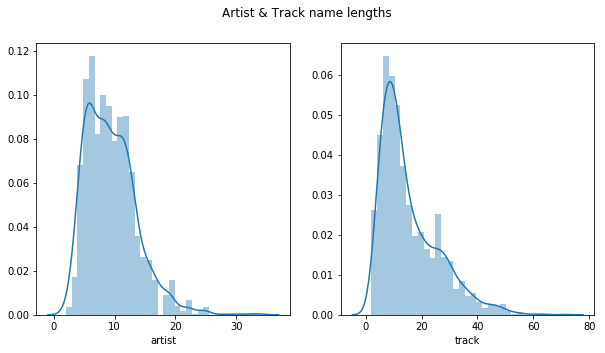

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(df_pos["artist"].str.len(), ax=axes[0])
sns.distplot(df_pos["track"].str.len(), ax=axes[1])
fig.suptitle("Artist & Track name lengths")
plt.show();

In [0]:
df_pos["artist"].str.len().describe()

count    1905.000000
mean        9.429396
std         4.213496
min         2.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        34.000000
Name: artist, dtype: float64

In [0]:
mask = df_pos["artist"].str.len().sort_values(ascending=False).index
df_pos["artist"].reindex(mask).head(10)

id
6ZapsNk1ZpaebNXAIohP9R    Edward Sharpe & The Magnetic Zeros
1XnBI56KASCBBp2NhNw7vg     Butch Walker and The Black Widows
1MSM3Fo2fvnwVqMcz8Jhjq      Andrew McMahon in the Wilderness
6ax0gtPudZ7ftuZD3UVy2A        Electric Joy Ride & Fusk Asker
1KLECfJisfvUCt1MMVBqty          Greta Svabo Bech x Zeds Dead
4C9kCkhaZcbgk5IyZoPFjC             Benjamin Francis Leftwich
4PDXtZQ83AJzfLWX0lcJux             Benjamin Francis Leftwich
2FlG7RSmCD0e3uvSNzdiMe             Benjamin Francis Leftwich
1qkzRGsiP90ZMjz8Bs97eg             We Were Promised Jetpacks
5PcaFI3LnZBx8hHxqN8M8c             Catfish and the Bottlemen
Name: artist, dtype: object

In [0]:
df_pos["track"].str.len().describe()

count    1905.000000
mean       15.589501
std        10.376246
min         2.000000
25%         8.000000
50%        12.000000
75%        21.000000
max        71.000000
Name: track, dtype: float64

In [0]:
mask = df_pos["track"].str.len().sort_values(ascending=False).index
df_pos["track"].reindex(mask).head(10)

id
0HbhqciGtYUATxvydST5h9    Runaway (U & I) - Speaker of the House's Big B...
4dVATnVPuIoV3UrZ1ILPSF    Friday Fish Fry - Maribou State & Pedestrian R...
44BRuSFBQwlycpn7ApWvEp    I'm Yours Tonight (feat. Brenton Mattheus & La...
0mF5ecWb5z3S5Fzn3aW9IL    Higher (feat. Emil Heró) - Oliver Nelson & Sko...
6EfhXbFmqapdZUjsAhWr9E    Hopeful Romantic (Johan Vilborg Remix) [feat. ...
3KtPJawCN9f5RbKL4YAZed    Heart Weighs A Ton (feat. Stefan Storm) - Vind...
5ZGyn0NX8gFmluoK56Atkz    The Girl (Mr FijiWiji Remix) [feat. Cozi Zuehl...
5bir8G10wUrNepFWgZY1UA    Follow You (Fractal Chill Mix) [feat. Danyka N...
4gQCGTiWqP74PDj6dMgrdM    When You Return feat. Daniela Andrade - Origin...
6y3IyUWmMpCZc2cTIMSHQ7    It's Alright (NGHTMRE Remix) [feat. Lizz Kelle...
Name: track, dtype: object

In [0]:
# tidy up lyric data
import re
def artist_cleaner(text):
  doc = re.sub(r'-',' ', text)
  doc = re.sub(r'\[','', text)
  doc = re.sub(r'\]','', text)
  doc = re.sub(r'\(','', text)
  doc = re.sub(r'\)','', text)
  # remove special chars
  doc = re.sub(r'\W', ' ', doc)
  # set to lowercase
  doc = doc.lower()
  # remove line breaks
  doc = re.sub(r"\n", " ", doc)
  # remove music terminology
  doc = re.sub(r"feature.*$", "", doc)
  doc = re.sub(r"featuring.*$", "", doc)
  doc = re.sub(r"remix.*$", "", doc)
  # substituting multiple spaces with single space
  doc = re.sub(r'\s+', ' ', doc, flags=re.I)
  return doc

def track_cleaner(text):
  doc = re.sub(r'-',' ', text)
  doc = re.sub(r'\[','', text)
  doc = re.sub(r'\]','', text)
  doc = re.sub(r'\(','', text)
  doc = re.sub(r'\)','', text)
  # remove special chars
  doc = re.sub(r'\W', ' ', doc)
  # set to lowercase
  doc = doc.lower()
  # remove line breaks
  doc = re.sub(r"\n", " ", doc)
  # remove music terminology
  doc = re.sub(r"feat.*$", "", doc)
  doc = re.sub(r"feature.*$", "", doc)
  doc = re.sub(r"featuring.*$", "", doc)
  doc = re.sub(r"remix.*$", "", doc)
  doc = re.sub(r"live.*$", "", doc)
  doc = re.sub(r"acoustic.*$", "", doc)
  doc = re.sub(r"with.*$", "", doc)
  doc = re.sub(r" vs.*$", "", doc)
  doc = re.sub(r"spotify.*$", "", doc)
  doc = re.sub(r"remastered.*$", "", doc)
  doc = re.sub(r"music from the original.*$", "", doc)
  doc = re.sub(r"original motion.*$", "", doc)
  doc = re.sub(r"original song.*$", "", doc)
  doc = re.sub(r"recorded at.*$", "", doc)
  doc = re.sub(r"studio recording.*$", "", doc)
  doc = re.sub(r"soundtrack.*$", "", doc)
  doc = re.sub(r"from the hbo.*$", "", doc)
  doc = re.sub(r"radio edit.*$", "", doc)
  # substituting multiple spaces with single space
  doc = re.sub(r'\s+', ' ', doc, flags=re.I)
  return doc

df_list = [df_pos, df_neg]
for df in df_list:
  df["artist"] = [artist_cleaner(artist) for artist in df["artist"]]
  df["track"] = [track_cleaner(track) for track in df["track"]]

df_pos[["artist", "track"]].head()

,artist,track
id,,
7eElVgPcxDqmgGrSwVFI74,lorde,sober
02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite
5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre
6Kkt27YmFyIFrcX3QXFi2o,lorde,liability
1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless


In [0]:
mask = df_pos["track"].str.len().sort_values(ascending=False).index
df_pos["track"].reindex(mask).head(10)

id
0HbhqciGtYUATxvydST5h9    runaway u i speaker of the house s big beat 5t...
2UgznAN1ydEe9dhBsOvW3U       we own the night the chainsmokers instrumental
0sqpVNd0N4QB02mE5JIcYz        feels like home red velvet dress original mix
7xcWK4szEPdQCp6lWORPPR           scars from the divergent series allegiant 
2bdR4MKUcVfaZtu6Kv7BXt            freeway flux pavilion and kill the noise 
5Q17mAldONliLKiSKpikRv            surprise yourself gryffin x manila killa 
3cIG78oBauowzEbkBwWADN            they move on tracks of never ending light
4dVATnVPuIoV3UrZ1ILPSF            friday fish fry maribou state pedestrian 
3KLw9poMK41dDWMEOzLdv9            kings and queens of summer not your dope 
3ekGTN2H0r3xWJcurSvozw              between the devil and the deep blue sea
Name: track, dtype: object

### Get Lyrics Data

In [0]:
for idx in df_pos.index[:5]:
  print("{}: {}".format(df_pos["artist"][idx],
                       df_pos["track"][idx]))

lorde: sober
lorde: homemade dynamite
lorde: the louvre
lorde: liability
lorde: hard feelings loveless


In [0]:
def get_lyrics(df, batch_size=100):
  """
  """
  # create lyrics column
  df["lyrics_raw"] = None

  # set batches
  batches = range(0, len(df), batch_size)
  batch_num = range(len(batches))
  print("Number of batches: {}".format(len(batch_num)))

  for n in batch_num:
    print("Starting Batch {}... ".format(n+1))
    
    for idx in range(len(df))[batches[n]:batches[n]+batch_size]:
      # find song with genius lyrics API
      genius = lyricsgenius.Genius(client_access_token)
      gen_search = genius.search_song(df["track"][idx], df["artist"][idx])

      try:
        df["lyrics_raw"].iloc[idx] = gen_search.lyrics
      except (RuntimeError, TypeError, AttributeError):
        pass
    
    print("\nFinished Batch {}... {} song lyrics retrieved.".format(
        n+1, len(df)-df["lyrics_raw"].isna().sum()))
    print('{}% of total songs done.\n'.format(
        np.round(((batches[n]+batch_size) / len(df) * 100), 2)))
  
  return df

In [0]:
#%%time
#get_lyrics(df_pos)

#print(df_pos.shape)
#print(df_pos["lyrics_raw"].dropna().shape)
#display(df_pos.tail(5))

In [0]:
# export data locally
#from google.colab import files
#filename = "spotify_pos_data"
#df_pos.to_csv(filename + ".csv", index=True)
#files.download(filename + ".csv")

In [0]:
%%time
get_lyrics(df_neg)

print(df_neg.shape)
print(df_neg["lyrics_raw"].dropna().shape)
display(df_neg.tail(5))

Number of batches: 20
Starting Batch 1... 
Searching for "16 days" by whiskeytown...
Done.
Searching for "always a friend" by alejandro escovedo...


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Done.
Searching for "if it takes a lifetime" by jason isbell...
Done.
Searching for "fruits of my labor" by lucinda williams...
Done.
Searching for "blue" by the jayhawks...
Done.
Searching for "windfall" by son volt...
Done.
Searching for "magnolia mountain" by ryan adams the cardinals...
Done.
Searching for "harlem river blues" by justin townes earle...
Done.
Searching for "copperhead road" by steve earle...
Done.
Searching for "traveling alone" by tift merritt...
Done.
Searching for "goddamn lonely love" by drive by truckers...
Done.
Searching for "ruby" by dave rawlings machine...
Done.
Searching for "aerosol ball" by the felice brothers...
Done.
Searching for "moonshiner" by uncle tupelo...
Done.
Searching for "bobby fuller died for your sins" by chuck prophet...
Done.
Searching for "breakfast in hell" by slaid cleaves...
Done.
Searching for "love hurts " by gram parsons...
Done.
Searching for "if we were vampires" by jason isbell and the 400 unit...
Done.
Searching for "the love 

,acousticness,analysis_url,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,target,track,artist,album,release_date,year,popularity,explicit,lyrics_raw
id,,,,,,,,,,,,,,,,,,,,,,,,,,
6LNgMe8d3Y8xxzJWFqpcRN,0.291,https://api.spotify.com/v1/audio-analysis/6LNg...,0.369,216200,0.523,0.003510,2,0.2940,-9.144,0,0.0326,121.435,4,https://api.spotify.com/v1/tracks/6LNgMe8d3Y8x...,audio_features,spotify:track:6LNgMe8d3Y8xxzJWFqpcRN,0.843,1,all your love stereo album version,john mayall the bluesbreakers,Bluesbreakers,1966-07-22,1966,8,False,None
5nI85hC79ERZoEMSreIk4q,0.670,https://api.spotify.com/v1/audio-analysis/5nI8...,0.652,177933,0.616,0.000033,10,0.5270,-9.697,0,0.1300,153.678,4,https://api.spotify.com/v1/tracks/5nI85hC79ERZ...,audio_features,spotify:track:5nI85hC79ERZoEMSreIk4q,0.825,1,wang dang doodle,koko taylor,Blues,2014-12-09,2014,0,False,"Tell Automatic Slim , tell Razor Totin' Jim\nT..."
1ZcBa2buf2Mx5LHTyOujri,0.976,https://api.spotify.com/v1/audio-analysis/1ZcB...,0.527,205493,0.171,0.000545,10,0.1140,-14.512,1,0.0353,106.462,4,https://api.spotify.com/v1/tracks/1ZcBa2buf2Mx...,audio_features,spotify:track:1ZcBa2buf2Mx5LHTyOujri,0.664,1,i m going away,elizabeth cotten,Shake Sugaree,2004-09-21,2004,33,False,"I am goin' away, baby\nAnd I'm goin' to stay;\..."
7lpsRa4kcNoxSHUDNDXpnn,0.767,https://api.spotify.com/v1/audio-analysis/7lps...,0.545,261093,0.271,0.000006,0,0.0728,-17.690,1,0.0667,113.963,4,https://api.spotify.com/v1/tracks/7lpsRa4kcNox...,audio_features,spotify:track:7lpsRa4kcNoxSHUDNDXpnn,0.679,1,evil woman,champion jack dupree,Blues From The Gutter,1958-01-01,1958,33,False,Evil Woman 4:17 Trk 4\nChampion Jack Dupree\n(...
2o3h9YnZHM6T4kzwwLNnHg,0.816,https://api.spotify.com/v1/audio-analysis/2o3h...,0.636,212813,0.840,0.002860,2,0.4250,-8.965,1,0.0415,141.878,4,https://api.spotify.com/v1/tracks/2o3h9YnZHM6T...,audio_features,spotify:track:2o3h9YnZHM6T4kzwwLNnHg,0.887,1,i got my mojo working,the paul butterfield blues band,The Paul Butterfield Blues Band,1965-01-01,1965,33,False,"[Verse 1]\nGot my mojo working, just don't wor..."


CPU times: user 4min 40s, sys: 6.52 s, total: 4min 46s
Wall time: 1h 19min 27s


In [0]:
# export data locally
from google.colab import files
filename = "spotify_neg_data"
df_neg.to_csv(filename + ".csv", index=True)
files.download(filename + ".csv")

#### Concat Dataframes

In [0]:
# concat lyrics into Dataframe
df_list = [df_pos, df_neg]
df_lyrics = pd.concat(df_list)

cols = ["artist", "track", "lyrics_raw"]
df_lyrics = df_lyrics[cols].reset_index()

print(df_lyrics.shape)
print(df_lyrics.dropna().shape)
df_lyrics.head()

(3837, 4)
(3489, 4)


,id,artist,track,lyrics_raw
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,..."
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ..."
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu..."
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...


In [0]:
#%%time
## get lyric NaNs
#mask = df_lyrics["lyrics_raw"].isna()
#df_lyrics_na= df_lyrics[mask]
## run NaN IDs again
#get_lyrics(df_lyrics_na)

#print(df_lyrics_na.shape)
#print(df_lyrics_na.dropna().shape)
#df_lyrics_na.head()

In [0]:
#if len(df_lyrics_na.dropna()) > 0:
#  df_lyrics = pd.concat([df_lyrics, df_lyrics_na])
#  df_lyrics_noNaNs = df_lyrics.copy()
#  print(df_lyrics_noNaNs.shape)
#  print(df_lyrics_noNaNs.dropna().shape)
#  df_lyrics = df_lyrics.dropna()
#  assert df_lyrics.shape == df_lyrics_noNaNs.dropna().shape
#  df_lyrics.head()

In [0]:
#df_lyrics_raw = df_lyrics.copy()
df_lyrics = df_lyrics.drop_duplicates(subset=["id"], keep="first").dropna()
df_lyrics.set_index("id", inplace=True)
print(df_lyrics_raw.shape)
print(df_lyrics.shape)
display(df_lyrics.info())
df_lyrics.head()

(3837, 4)
(3488, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 3488 entries, 7eElVgPcxDqmgGrSwVFI74 to 2o3h9YnZHM6T4kzwwLNnHg
Data columns (total 3 columns):
artist        3488 non-null object
track         3488 non-null object
lyrics_raw    3488 non-null object
dtypes: object(3)
memory usage: 109.0+ KB


None

,artist,track,lyrics_raw
id,,,
7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,..."
02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...
5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ..."
6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu..."
1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...


In [0]:
#Audio_features_raw = Audio_features.copy()
#Audio_features["id"] = df_lyrics["id"]
Audio_features.set_index("id", inplace=True)
Audio_features = Audio_features.loc[df_lyrics.index]
Audio_features = Audio_features.dropna()
print(Audio_features_raw.shape)
print(Audio_features.shape)
Audio_features.info()

(3837, 17)
(3489, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 3489 entries, 7eElVgPcxDqmgGrSwVFI74 to 2o3h9YnZHM6T4kzwwLNnHg
Data columns (total 17 columns):
target              3489 non-null int64
acousticness        3489 non-null float64
danceability        3489 non-null float64
duration_ms         3489 non-null int64
energy              3489 non-null float64
explicit            3489 non-null bool
instrumentalness    3489 non-null float64
key                 3489 non-null int64
liveness            3489 non-null float64
loudness            3489 non-null float64
mode                3489 non-null int64
popularity          3489 non-null int64
speechiness         3489 non-null float64
tempo               3489 non-null float64
time_signature      3489 non-null int64
valence             3489 non-null float64
year                3489 non-null int64
dtypes: bool(1), float64(9), int64(7)
memory usage: 466.8+ KB


In [0]:
# target value
print("Target class distribution:")
for c in Audio_features["target"].unique():
  class_c = len(Audio_features["target"].loc[Audio_features["target"]==c])/len(Audio_features)
  print("Class {}: {}%".format(c, class_c*100))

Target class distribution:
Class 0: 49.527085124677555%
Class 1: 50.47291487532244%


#### Save data locally

In [0]:
# export data locally
from google.colab import files
filename = "spotify_lyrics_raw"
df_lyrics.to_csv(filename + ".csv", index=True)
files.download(filename + ".csv")

In [0]:
# export data locally
#from google.colab import files
filename = "spotify_features"
Audio_features.to_csv(filename + ".csv", index=True)
files.download(filename + ".csv")